# Quick Start Tutorial

## Read a FreeStyle Libre csv file
This assumes the following:

First, import `glyco`

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import glyco as gl

Define the location of your file, make sure the file follows the requirements above. If not feel free to use the test dataset **TODO**

In [3]:
file_path = 'test/data/sample_glucose.csv'

Read the csv file using glyco, this generates **TODO**

**Note:** In this sample file the 2nd row contains the column definitions, which is why we skip the first row

In [4]:
glucose = gl.read_csv(file_path=file_path, skiprows=1)

In [5]:
glucose.head(3)

,Device,Serial Number,Device Timestamp,Record Type,Historic Glucose mmol/L,Scan Glucose mmol/L,Non-numeric Rapid-Acting Insulin,Rapid-Acting Insulin (units),Non-numeric Food,Carbohydrates (grams),...,shifted_weekday,shifted_is_weekend,G,t,dg,dt,dg_dt,auc_mean,auc_lim,auc_min
t,,,,,,,,,,,,,,,,,,,,,
2019-12-05 17:41:00,FreeStyle LibreLink,b59d4499-1a07-462b-b7da-a179f2093996,05-12-2019 17:41,0,7.1,NaN,NaN,NaN,NaN,NaN,...,Thu,0,6.900000,2019-12-05 17:41:00,NaN,NaN,NaN,NaN,NaN,NaN
2019-12-05 17:58:00,FreeStyle LibreLink,b59d4499-1a07-462b-b7da-a179f2093996,05-12-2019 17:58,0,6.9,NaN,NaN,NaN,NaN,NaN,...,Thu,0,6.966667,2019-12-05 17:58:00,0.066667,1020.0,0.000065,1641.781433,986.000000,6380.915217
2019-12-05 18:01:00,FreeStyle LibreLink,b59d4499-1a07-462b-b7da-a179f2093996,05-12-2019 18:01,1,NaN,7.3,NaN,NaN,NaN,NaN,...,Thu,0,6.976524,2019-12-05 18:01:00,0.009858,180.0,0.000055,291.500516,175.774381,1127.818243


In [9]:
glucose.columns

Index(['Device', 'Serial Number', 'Device Timestamp', 'Record Type',
       'Historic Glucose mmol/L', 'Scan Glucose mmol/L',
       'Non-numeric Rapid-Acting Insulin', 'Rapid-Acting Insulin (units)',
       'Non-numeric Food', 'Carbohydrates (grams)', 'Carbohydrates (servings)',
       'Non-numeric Long-Acting Insulin', 'Long-Acting Insulin Value (units)',
       'Notes', 'Strip Glucose mmol/L', 'Ketone mmol/L',
       'Meal Insulin (units)', 'Correction Insulin (units)',
       'User Change Insulin (units)', 'date', 'date_str', 'hour', 'dayofweek',
       'weekday', 'is_weekend', 'shifted_t', 'shifted_date',
       'shifted_date_str', 'shifted_hour', 'shifted_dayofweek',
       'shifted_weekday', 'shifted_is_weekend', 'G', 't', 'dg', 'dt', 'dg_dt',
       'auc_mean', 'auc_lim', 'auc_min'],
      dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


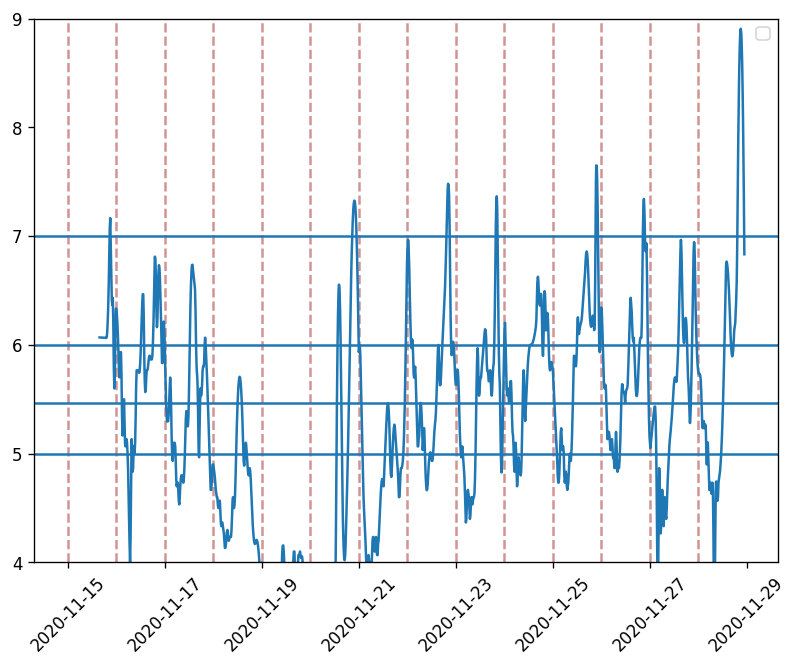

In [6]:
gl.plot_glucose(glucose, from_time='2020-11-01')

AttributeError: module 'glyco' has no attribute 'infer_meals_from_notes'

# Meals


In [7]:
glucose['t']

t
2019-12-05 17:41:00   2019-12-05 17:41:00
2019-12-05 17:58:00   2019-12-05 17:58:00
2019-12-05 18:01:00   2019-12-05 18:01:00
2019-12-05 18:13:00   2019-12-05 18:13:00
2019-12-05 18:28:00   2019-12-05 18:28:00
                              ...        
2020-11-28 22:08:00   2020-11-28 22:08:00
2020-11-28 22:08:00   2020-11-28 22:08:00
2020-11-28 22:18:00   2020-11-28 22:18:00
2020-11-28 22:33:00   2020-11-28 22:33:00
2020-11-28 22:48:00   2020-11-28 22:48:00
Name: t, Length: 11069, dtype: datetime64[ns]

In [108]:
import glyco as gl

#meals = gl.infer_meals_from_notes(glucose, filter_notes_map=lambda x: False if not x or  else True)
events = gl.infer_events_from_notes(glucose, filter_notes_map=lambda x: True if type(x)==str  else False)

In [109]:
gl.sessionize_events(events)

,Device,Serial Number,Device Timestamp,Record Type,Historic Glucose mmol/L,Scan Glucose mmol/L,Non-numeric Rapid-Acting Insulin,Rapid-Acting Insulin (units),Non-numeric Food,Carbohydrates (grams),...,t,dg,dt,dg_dt,auc_mean,auc_lim,auc_min,dt_next_event,event_session_start,event_session_id
t,,,,,,,,,,,,,,,,,,,,,
2019-12-06 10:34:00,FreeStyle LibreLink,b59d4499-1a07-462b-b7da-a179f2093996,06-12-2019 10:34,6,NaN,NaN,NaN,NaN,NaN,NaN,...,2019-12-06 10:34:00,0.000000,0.0,NaN,0.000000,0.000000,0.000000,NaN,True,1
2019-12-06 11:13:00,FreeStyle LibreLink,b59d4499-1a07-462b-b7da-a179f2093996,06-12-2019 11:13,6,NaN,NaN,NaN,NaN,NaN,NaN,...,2019-12-06 11:13:00,0.000000,0.0,NaN,0.000000,0.000000,0.000000,2340.0,False,1
2019-12-08 13:36:00,FreeStyle LibreLink,b59d4499-1a07-462b-b7da-a179f2093996,08-12-2019 13:36,6,NaN,NaN,NaN,NaN,NaN,NaN,...,2019-12-08 13:36:00,0.000000,0.0,NaN,0.000000,0.000000,0.000000,181380.0,True,2
2020-03-17 21:03:00,FreeStyle LibreLink,b59d4499-1a07-462b-b7da-a179f2093996,17-03-2020 21:03,6,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-03-17 21:03:00,0.000000,0.0,NaN,0.000000,0.000000,0.000000,8666820.0,True,3
2020-03-17 22:18:00,FreeStyle LibreLink,b59d4499-1a07-462b-b7da-a179f2093996,17-03-2020 22:18,6,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-03-17 22:18:00,-0.028326,120.0,-0.000236,69.751627,0.000000,627.296778,4500.0,False,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-27 16:35:00,FreeStyle LibreLink,b59d4499-1a07-462b-b7da-a179f2093996,27-11-2020 16:35,6,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-11-27 16:35:00,-0.086783,600.0,-0.000145,434.306573,48.552789,3222.032329,1020.0,False,72
2020-11-28 11:00:00,FreeStyle LibreLink,b59d4499-1a07-462b-b7da-a179f2093996,28-11-2020 11:00,6,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-11-28 11:00:00,0.000000,0.0,NaN,0.000000,0.000000,0.000000,66300.0,True,73
2020-11-28 11:15:00,FreeStyle LibreLink,b59d4499-1a07-462b-b7da-a179f2093996,28-11-2020 11:15,6,NaN,NaN,NaN,NaN,NaN,NaN,...,2020-11-28 11:15:00,0.075004,900.0,0.000083,0.000000,0.000000,3834.635316,900.0,False,73


In [43]:
showers = gl.infer_events_from_notes(glucose, filter_notes_map=lambda x: True if type(x)==str and 'shower' in x.lower()  else False)

In [106]:
glucose[glucose['Record Type']==6]

,Device,Serial Number,Device Timestamp,Record Type,Historic Glucose mmol/L,Scan Glucose mmol/L,Non-numeric Rapid-Acting Insulin,Rapid-Acting Insulin (units),Non-numeric Food,Carbohydrates (grams),...,shifted_weekday,shifted_is_weekend,G,t,dg,dt,dg_dt,auc_mean,auc_lim,auc_min
t,,,,,,,,,,,,,,,,,,,,,
2019-12-05 23:13:00,FreeStyle LibreLink,b59d4499-1a07-462b-b7da-a179f2093996,05-12-2019 23:13,6,NaN,NaN,NaN,NaN,NaN,NaN,...,Thu,0,6.802685,2019-12-05 23:13:00,0.162417,840.0,0.000193,1214.310640,674.255343,5117.126699
2019-12-05 23:45:00,FreeStyle LibreLink,b59d4499-1a07-462b-b7da-a179f2093996,05-12-2019 23:45,6,NaN,NaN,NaN,NaN,NaN,NaN,...,Thu,0,6.824927,2019-12-05 23:45:00,-0.008406,60.0,-0.000140,88.071004,49.495625,366.843579
2019-12-06 10:34:00,FreeStyle LibreLink,b59d4499-1a07-462b-b7da-a179f2093996,06-12-2019 10:34,6,NaN,NaN,NaN,NaN,NaN,NaN,...,Fri,0,4.690199,2019-12-06 10:34:00,0.000000,0.0,NaN,0.000000,0.000000,0.000000
2019-12-06 11:13:00,FreeStyle LibreLink,b59d4499-1a07-462b-b7da-a179f2093996,06-12-2019 11:13,6,NaN,NaN,NaN,NaN,NaN,NaN,...,Fri,0,4.619717,2019-12-06 11:13:00,0.000000,0.0,NaN,0.000000,0.000000,0.000000
2019-12-06 11:13:00,FreeStyle LibreLink,b59d4499-1a07-462b-b7da-a179f2093996,06-12-2019 11:13,6,NaN,NaN,NaN,NaN,NaN,NaN,...,Fri,0,4.619717,2019-12-06 11:13:00,0.000000,0.0,NaN,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-28 14:44:00,FreeStyle LibreLink,b59d4499-1a07-462b-b7da-a179f2093996,28-11-2020 14:44,6,NaN,NaN,NaN,NaN,NaN,NaN,...,Sat,1,6.653581,2020-11-28 14:44:00,0.000000,0.0,NaN,0.000000,0.000000,0.000000
2020-11-28 15:12:00,FreeStyle LibreLink,b59d4499-1a07-462b-b7da-a179f2093996,28-11-2020 15:12,6,NaN,NaN,NaN,NaN,NaN,NaN,...,Sat,1,6.494491,2020-11-28 15:12:00,-0.070538,660.0,-0.000107,750.692932,326.363770,3817.191264
2020-11-28 15:12:00,FreeStyle LibreLink,b59d4499-1a07-462b-b7da-a179f2093996,28-11-2020 15:12,6,NaN,NaN,NaN,NaN,NaN,NaN,...,Sat,1,6.494491,2020-11-28 15:12:00,0.000000,0.0,NaN,0.000000,0.000000,0.000000


In [60]:
glucose.groupby('Record Type').count().iloc[2]

Device                               16
Serial Number                        16
Device Timestamp                     16
Historic Glucose mmol/L               0
Scan Glucose mmol/L                   0
Non-numeric Rapid-Acting Insulin      0
Rapid-Acting Insulin (units)          0
Non-numeric Food                     14
Carbohydrates (grams)                 2
Carbohydrates (servings)              0
Non-numeric Long-Acting Insulin       0
Long-Acting Insulin Value (units)     0
Notes                                 0
Strip Glucose mmol/L                  0
Ketone mmol/L                         0
Meal Insulin (units)                  0
Correction Insulin (units)            0
User Change Insulin (units)           0
date                                 16
date_str                             16
hour                                 16
dayofweek                            16
weekday                              16
is_weekend                           16
shifted_t                            16


In [27]:

def f(x):
    print(x.keys())
    print(x['Notes'])
meals_df[meals_df.apply(lambda x: f(x), axis=1)]

Index(['Device', 'Serial Number', 'Device Timestamp', 'Record Type',
       'Historic Glucose mmol/L', 'Scan Glucose mmol/L',
       'Non-numeric Rapid-Acting Insulin', 'Rapid-Acting Insulin (units)',
       'Non-numeric Food', 'Carbohydrates (grams)', 'Carbohydrates (servings)',
       'Non-numeric Long-Acting Insulin', 'Long-Acting Insulin Value (units)',
       'Notes', 'Strip Glucose mmol/L', 'Ketone mmol/L',
       'Meal Insulin (units)', 'Correction Insulin (units)',
       'User Change Insulin (units)', 'date', 'date_str', 'hour', 'dayofweek',
       'weekday', 'is_weekend', 'shifted_t', 'shifted_date',
       'shifted_date_str', 'shifted_hour', 'shifted_dayofweek',
       'shifted_weekday', 'shifted_is_weekend', 'G', 't', 'dg', 'dt', 'dg_dt',
       'auc_mean', 'auc_lim', 'auc_min'],
      dtype='object')
nan
Index(['Device', 'Serial Number', 'Device Timestamp', 'Record Type',
       'Historic Glucose mmol/L', 'Scan Glucose mmol/L',
       'Non-numeric Rapid-Acting Insulin', 'R

KeyError: "None of [Index([None, None, None, None, None, None, None, None, None, None,\n       ...\n       None, None, None, None, None, None, None, None, None, None],\n      dtype='object', length=741)] are in the [columns]"

In [ ]:
def get_indexed_meals(idx, session_len_s=S):
    df = meals
    df.set_index([idx], inplace=True)
    df = df.sort_index()
    df['dt'] = df.ctime.diff().dt.total_seconds()
    df['session_start'] = (df.dt.isnull()) | (df.dt > session_len_s)
    df['meal_id'] = df[df['session_start']].ctime.rank(method='first').astype(int)
    df['meal_id'] = df['meal_id'].fillna(method='ffill').astype(int)
    return df

def get_meals(smdf, gdf, session_len):
    mdf = smdf
    # sessionize
    # find start, end
    
    #
    return mdf

In [62]:
edf = events.sort_index()

In [ ]:
edf 

In [69]:
edf['dt_next_event']= edf.t.diff().dt.total_seconds()

t
2019-12-06 10:34:00          NaN
2019-12-06 11:13:00       2340.0
2019-12-08 13:36:00     181380.0
2020-03-17 21:03:00    8666820.0
2020-03-17 22:18:00       4500.0
                         ...    
2020-11-27 16:35:00       1020.0
2020-11-28 11:00:00      66300.0
2020-11-28 11:15:00        900.0
2020-11-28 11:15:00          0.0
2020-11-28 15:12:00      14220.0
Name: dt_next_event, Length: 165, dtype: float64

In [96]:
edf['event_session_start'].index.

AttributeError: 'DatetimeIndex' object has no attribute 'ctime'

In [97]:
session_seconds = 2 * 60 * 60

edf['dt_next_event']= edf.t.diff().dt.total_seconds()
edf['event_session_start'] = (edf.dt_next_event.isnull()) | (edf.dt_next_event > session_seconds)
edf['event_session_id'] = edf[edf['event_session_start']].t.rank(method='first').astype(int)
edf['event_session_id'] = edf['event_session_id'].fillna(method='ffill').astype(int)

    

In [99]:
edf[['t', 'event_session_start','event_session_id', 'Notes']]

,t,event_session_start,event_session_id,Notes
t,,,,
2019-12-06 10:34:00,2019-12-06 10:34:00,True,1,Actual 74mg/dl 2.5 ket mmol/l
2019-12-06 11:13:00,2019-12-06 11:13:00,False,1,MacCocoMCT
2019-12-08 13:36:00,2019-12-08 13:36:00,True,2,Macacocoleftover
2020-03-17 21:03:00,2020-03-17 21:03:00,True,3,Afterfood
2020-03-17 22:18:00,2020-03-17 22:18:00,False,3,After
...,...,...,...,...
2020-11-27 16:35:00,2020-11-27 16:35:00,False,72,Shower
2020-11-28 11:00:00,2020-11-28 11:00:00,True,73,Shower
2020-11-28 11:15:00,2020-11-28 11:15:00,False,73,Yoga


In [110]:
import utils as ul

In [111]:
showers

,Device,Serial Number,Device Timestamp,Record Type,Historic Glucose mmol/L,Scan Glucose mmol/L,Non-numeric Rapid-Acting Insulin,Rapid-Acting Insulin (units),Non-numeric Food,Carbohydrates (grams),...,shifted_weekday,shifted_is_weekend,G,t,dg,dt,dg_dt,auc_mean,auc_lim,auc_min
t,,,,,,,,,,,,,,,,,,,,,
2020-11-21 10:47:00,FreeStyle LibreLink,b59d4499-1a07-462b-b7da-a179f2093996,21-11-2020 10:47,6,NaN,NaN,NaN,NaN,NaN,NaN,...,Sat,1,4.617992,2020-11-21 10:47:00,0.000000,0.0,NaN,0.000000,0.000000,0.000000
2020-11-27 11:06:00,FreeStyle LibreLink,b59d4499-1a07-462b-b7da-a179f2093996,27-11-2020 11:06,6,NaN,NaN,NaN,NaN,NaN,NaN,...,Fri,0,5.390731,2020-11-27 11:06:00,0.000000,0.0,NaN,0.000000,0.000000,0.000000
2020-11-27 16:35:00,FreeStyle LibreLink,b59d4499-1a07-462b-b7da-a179f2093996,27-11-2020 16:35,6,NaN,NaN,NaN,NaN,NaN,NaN,...,Fri,0,6.080921,2020-11-27 16:35:00,-0.086783,600.0,-0.000145,434.306573,48.552789,3222.032329
2020-11-28 11:00:00,FreeStyle LibreLink,b59d4499-1a07-462b-b7da-a179f2093996,28-11-2020 11:00,6,NaN,NaN,NaN,NaN,NaN,NaN,...,Sat,1,4.896569,2020-11-28 11:00:00,0.000000,0.0,NaN,0.000000,0.000000,0.000000


In [ ]:
ul.find_nearest(glucose, )

In [ ]:

def rev(drink):
    gl.start_plot(3,3)
    ms = dmeals.loc[drink]
    diff=ms['gdiff']
    itg= ms['itg']
    print('GDIFF: {} ITG {} ENT {} Glycemic Score: {:.2%} \n>>NSCORE: {:.2%}'.format(ms['gdiff'], ms['itg'], ms['entropy'], (dmin/diff + imin/itg)/(dmin+imin) -1, ms['nscore']))
    gl.plot_resp_meal(glucose, meals, drink, whole=False)
    plt.xticks(rotation=45)

In [ ]:

def plot_resp_meal(gdf, meals, mid, glbl=G_LBL, print_values=False, whole=True, debug=False):
    m_all = meals.loc[meals.meal_id == mid]
    if type(m_all) != pd.DataFrame:
        m_all = pd.DataFrame([m_all.values], columns=m_all.index)

    start, end, gmin, gmax, pid, lid, peak, low, dg_dt_max = m_all['start'].min(), \
                                                             m_all['end'].max(), \
                                                             m_all['gmin'].min(), \
                                                             m_all['gmax'].min(), \
                                                             m_all['pid'].min(), \
                                                             m_all['lid'].min(), \
                                                             m_all['peak'].min(), \
                                                             m_all['low'].min(), \
                                                             m_all['dg_dt_max'].max()
    meal_gl = gdf.loc[start:end][glbl]
    plt.plot(meal_gl)

    # df.loc[nmin:nmax].dg_dt.plot()
    if debug:
        plt.axvline(gmin, color='black', label='first meal gluc ind')
        plt.axvline(gmax, color='black', label='last meal gluc ind')

    #plt.axvspan(start, end, color='green', alpha=0.01)
    plt.axvline(start, color='black')
    plt.axvline(end, color='black')
    [plt.axvline(x.ctime, color='red', label='Photo: {}'.format(x.filename)) for _, x in m_all.iterrows()]
    plt.axvspan(start, gmax+tdel(minutes=20), color='yellow', alpha=0.1, label='Estimated eating period')

    if debug:
        plt.axvline(pid, color='red')
        plt.axvline(lid, color='orange')

    mu = gdf[glbl].median()
    plt.axhline(y=mu, color='green', label='Median Glucose')
    z1 = meal_gl.map(lambda x: mu)
    plt.fill_between(meal_gl.index, z1, meal_gl, where= meal_gl>=mu,color='blue', alpha=0.2, label='Area above the median')
    # plt.ylim(df[gl.G_LBL].min(), df[gl.G_LBL].max())
    plt.title('{} -- {}'.format(' '.join(m_all.filename), mid))
    plt.ylabel('Glucose (mmol/L)')
    plt.ylim(min(gdf[glbl].quantile(.1), meal_gl.min()), gdf[glbl].max())
    if whole:
        end_plot()
    if print_values:
        print('Itg : {} \t'.format(m_all['itg'].min()))

Timestamp('2019-12-06 10:34:00')

Timestamp('2019-12-06 10:34:00')

# Meal properties finding

In [127]:
gdf = gl.read_csv(file_path=file_path, skiprows=1, filter_glucose_rows=True)
ttf = meals.t[0]
ttf2 = ul.find_nearest(gdf, ttf, col='t')
print(f'Found {ttf2} for {ttf}')

Found 2019-12-06 10:35:00 for 2019-12-06 10:34:00


**Meals should return**
* `timestamp_origin`
* `timestamp_nearest`

* `meal_ref`
* `meal_notes`
* `meal_id`

Session specific:
* `event_session_id`
* `start_estimate` (timestamp) start of the event session
* `end_estimate` (timestamp)
* glucose stats:
  * Glucose max
  * Glucose min
  * Glucose average
  * Glucose standard deviation
  * Glucose 68th percentile
  * Glucose 95th percentile
  * Glucose 5th percentile
* calculated features:
  * Area Under the Curve (see models)
    * Above minimum
    * Above threshold
    * Above mean
  * Ingestion speed
  * Clearance speed



Optional/Next version:
* `start_orig` if has a start origin.


* *Optional*:
  * References if provided in the input (if a folder is used)
  * Notes if provided in the input
  * timezone difference
* Glucose stats:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


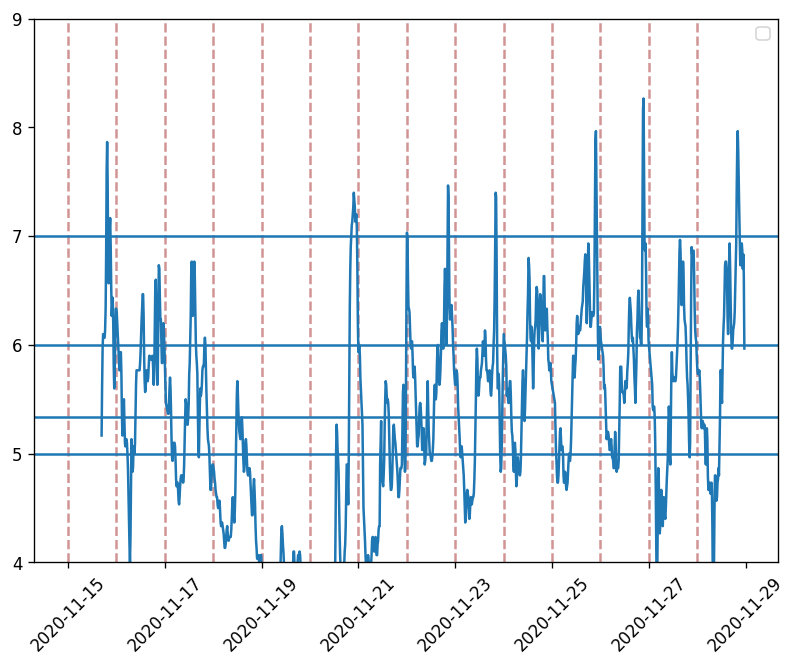